# 1. Import the modules

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import missingno

In [2]:
import math, time, random, datetime

from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

# 2. Loading Data

In [3]:
test = pd.read_csv("/Users/lukasmetz/Desktop/Kaggle/UsAdultsIncome/adult-test.csv")
train = pd.read_csv("/Users/lukasmetz/Desktop/Kaggle/UsAdultsIncome/adult-training.csv")

In [4]:
test.head()

,,,,,,,,,,,,,,|1x3 Cross validator
25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [5]:
train.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [6]:
train.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [7]:
#Renaming the columns
columns = ["Age", "Workclass", "Number", "Education", "EducationNumber", "MaritalStatus", "Occupation", "Relationship", "Race", "Sex", "CapitalGain", "CapitalLoss", "Hours/Week", "NativeCountry", "Target"]
train.columns = columns

In [8]:
train.head(2)

,Age,Workclass,Number,Education,EducationNumber,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,Hours/Week,NativeCountry,Target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


# 3. Exploring the train data

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              32560 non-null  int64 
 1   Workclass        32560 non-null  object
 2   Number           32560 non-null  int64 
 3   Education        32560 non-null  object
 4   EducationNumber  32560 non-null  int64 
 5   MaritalStatus    32560 non-null  object
 6   Occupation       32560 non-null  object
 7   Relationship     32560 non-null  object
 8   Race             32560 non-null  object
 9   Sex              32560 non-null  object
 10  CapitalGain      32560 non-null  int64 
 11  CapitalLoss      32560 non-null  int64 
 12  Hours/Week       32560 non-null  int64 
 13  NativeCountry    32560 non-null  object
 14  Target           32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


- 15 columns and 32560 rows
- no null values 
- dtypes: int and object 

<AxesSubplot:>

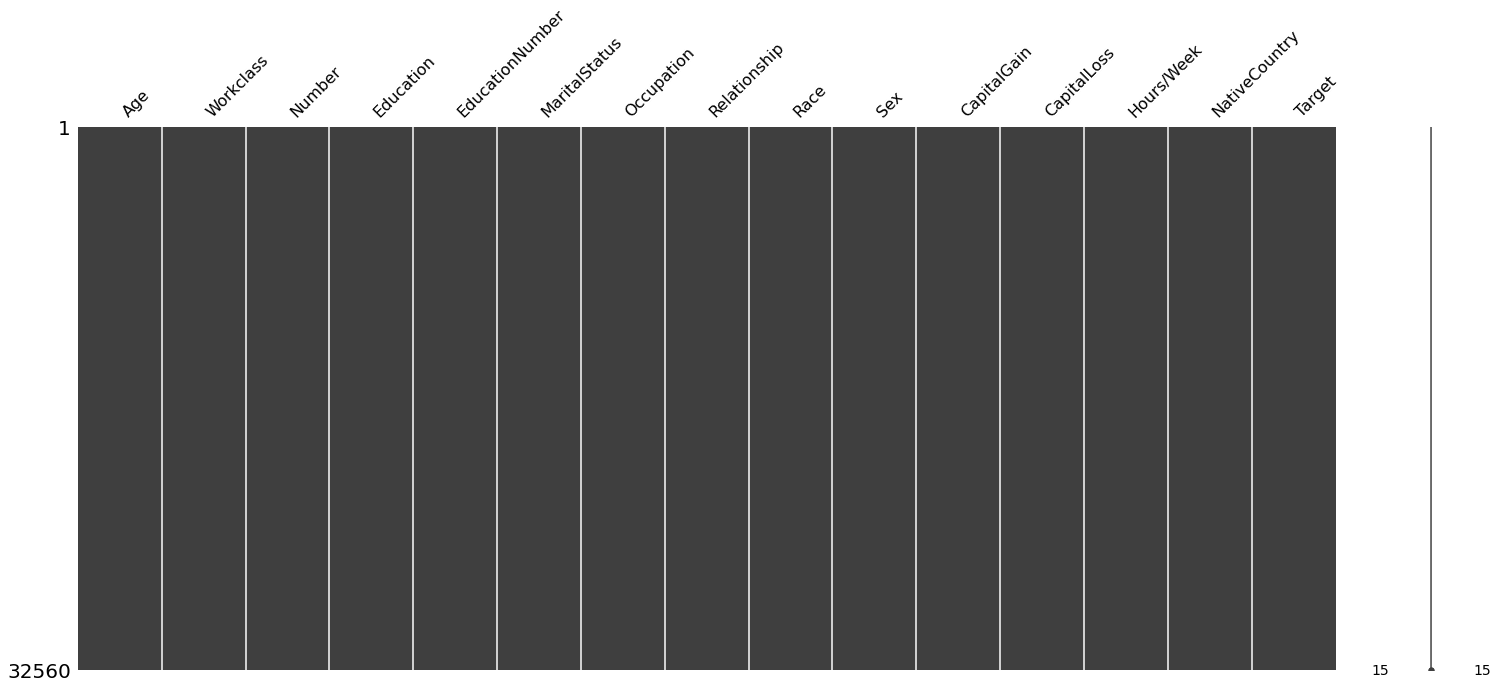

In [10]:
missingno.matrix(train)

In [11]:
train.isnull().sum()

Age                0
Workclass          0
Number             0
Education          0
EducationNumber    0
MaritalStatus      0
Occupation         0
Relationship       0
Race               0
Sex                0
CapitalGain        0
CapitalLoss        0
Hours/Week         0
NativeCountry      0
Target             0
dtype: int64

- no NaN-values

In [12]:
train.describe()

,Age,Number,EducationNumber,CapitalGain,CapitalLoss,Hours/Week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["Age", "EducationNumber", "CapitalGain", "CapitalLoss", "Hours/Week"]

scatter_matrix(train[attributes], figsize=(12,8))
plt.show()

# Tune and transform the data

In [13]:
train["Target"].value_counts()

 <=50K    24719
 >50K      7841
Name: Target, dtype: int64

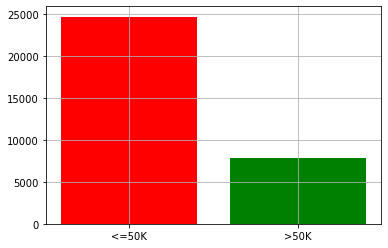

In [14]:
plt.bar(["<=50K", ">50K"], [train["Target"].value_counts()[0], train["Target"].value_counts()[1]], color = ["red", "green"])
plt.grid()
plt.show()

## Tuning the target column in binary-variable (0,1)

In [15]:
train["Target"].values

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

- Attention the values starts with a space
- we can remove the space, but that is unnecessary, because of transforming the values in 0 and 1 

In [16]:
train["Target"] = train["Target"].apply(lambda x: 0 if x == " <=50K" else 1)

In [17]:
train["Target"]

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Target, Length: 32560, dtype: int64

In [18]:
#compare to the numbers before tuning 
train["Target"].value_counts()

0    24719
1     7841
Name: Target, dtype: int64

- 0 -> <=50K
- 1 -> >50K

### Feature: Workclass

In [19]:
train["Workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [20]:
train.Workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

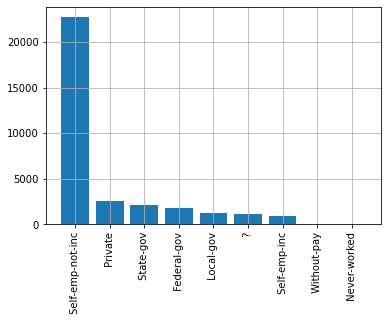

In [21]:
plt.bar(train.Workclass.unique(), train["Workclass"].value_counts().values)
plt.xticks(rotation ="vertical")
plt.grid()
plt.show()

In [22]:
#creating a list with the columns which we have to encode
encCol = []
encCol.append("Workclass")
encCol

['Workclass']

In [23]:
train.head(1)

,Age,Workclass,Number,Education,EducationNumber,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,Hours/Week,NativeCountry,Target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0


### Feature: Number

In [24]:
train.Number.value_counts()

123011    13
203488    13
164190    13
121124    12
148995    12
          ..
68318      1
284211     1
312881     1
177711     1
229376     1
Name: Number, Length: 21647, dtype: int64

- seems not to be a useful feauture
- deleting the column

In [25]:
del train["Number"]

### Feature: Education 

In [26]:
train.Education.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

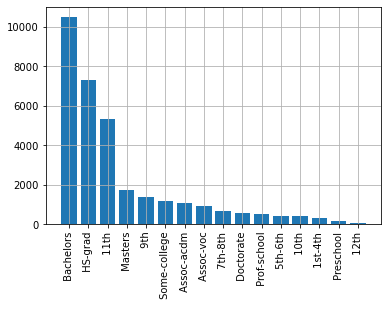

In [27]:
plt.bar(train.Education.unique(), train.Education.value_counts().values)
plt.xticks(rotation ="vertical")
plt.grid()
plt.show()

In [28]:
#add the column to our encoding list
encCol.append("Education")
encCol

['Workclass', 'Education']

### Feature: EducationNumber

In [29]:
train.groupby(["Education", "EducationNumber"], as_index = False)["Relationship"].count()

,Education,EducationNumber,Relationship
0,10th,6,933
1,11th,7,1175
2,12th,8,433
3,1st-4th,2,168
4,5th-6th,3,333
5,7th-8th,4,646
6,9th,5,514
7,Assoc-acdm,12,1067
8,Assoc-voc,11,1382
9,Bachelors,13,5354


- shows us that one name of column "Education" represents one "EducationNumber"
- so the two columns represent the same 
    - we can delete one of these
    - deleting the Education column
        - numerical Feature are better for algorithm
    - deleting the name in the encCol list

In [30]:
#deleting column Education
del train["Education"]
train.head()

,Age,Workclass,EducationNumber,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,Hours/Week,NativeCountry,Target
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [31]:
encCol.remove("Education")
encCol

['Workclass']

### Feature: MaritalStatus

In [32]:
train.MaritalStatus.value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: MaritalStatus, dtype: int64

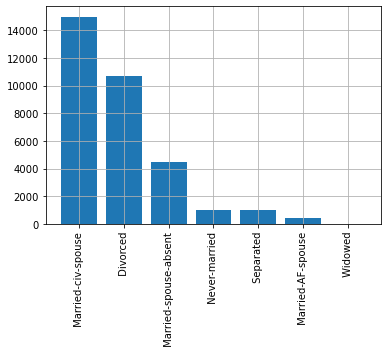

In [33]:
plt.bar(train.MaritalStatus.unique(), train.MaritalStatus.value_counts().values)
plt.xticks(rotation="vertical")
plt.grid()
plt.show()

In [34]:
#add MaritalStatus to our encCol list
encCol.append("MaritalStatus")
encCol

['Workclass', 'MaritalStatus']

### Feature: Occupation

In [35]:
train.Occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

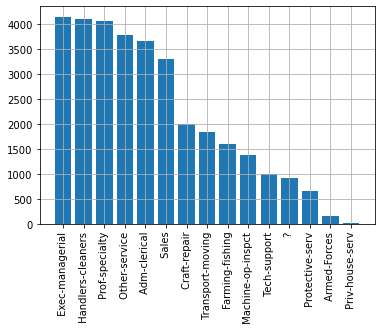

In [36]:
plt.bar(train.Occupation.unique(), train.Occupation.value_counts().values)
plt.xticks(rotation="vertical")
plt.grid()
plt.show()

In [37]:
encCol.append("Occupation")

In [38]:
encCol

['Workclass', 'MaritalStatus', 'Occupation']

### Feature: Relationship

In [39]:
train.Relationship.value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

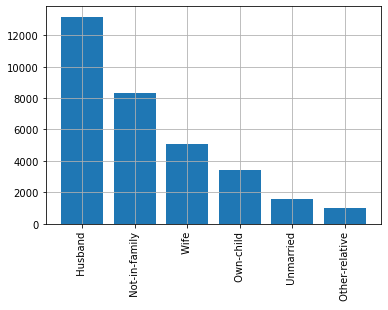

In [40]:
plt.bar(train.Relationship.unique(), train.Relationship.value_counts().values)
plt.xticks(rotation="vertical")
plt.grid()
plt.show()

In [41]:
#adding to our encCol list
encCol.append("Relationship")
encCol

['Workclass', 'MaritalStatus', 'Occupation', 'Relationship']

### Feature: Sex 

In [42]:
train.Sex.value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

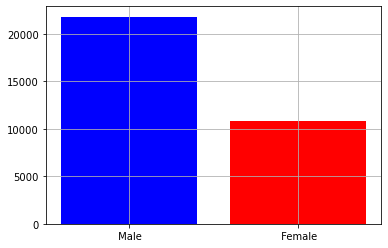

In [43]:
plt.bar(train.Sex.unique(), train.Sex.value_counts().values, color = ["blue", "red"])
plt.grid()
plt.show()

- have to tune the values
    - Male = 0
    - Female = 1

In [44]:
train.Sex.values

array([' Male', ' Male', ' Male', ..., ' Female', ' Male', ' Female'],
      dtype=object)

In [45]:
train["Sex"] = train.Sex.replace(" Male", 0)
train["Sex"] = train.Sex.replace(" Female", 1)
train.Sex.value_counts()

0    21789
1    10771
Name: Sex, dtype: int64

### Feature: CapitalGain

In [46]:
train.CapitalGain.value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: CapitalGain, Length: 119, dtype: int64

In [47]:
del train["CapitalGain"]
train.head(2)

,Age,Workclass,EducationNumber,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalLoss,Hours/Week,NativeCountry,Target
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,0
1,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,0


### Feature: CapitalLoss

In [48]:
train.CapitalLoss.value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: CapitalLoss, Length: 92, dtype: int64

In [49]:
del train["CapitalLoss"]
train.head(1)

,Age,Workclass,EducationNumber,MaritalStatus,Occupation,Relationship,Race,Sex,Hours/Week,NativeCountry,Target
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,0,13,United-States,0


### Feature: Race

In [50]:
train.Race.value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

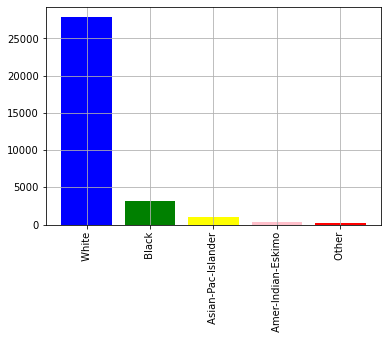

In [51]:
plt.bar(train.Race.unique(), train.Race.value_counts().values, color = ["blue", "green", "yellow", "pink", "red"])
plt.xticks(rotation="vertical")
plt.grid()
plt.show()

In [52]:
encCol.append("Race")
encCol

['Workclass', 'MaritalStatus', 'Occupation', 'Relationship', 'Race']

### Feature: Hours/Week

In [53]:
train["Hours/Week"].value_counts()

40    15216
50     2819
45     1824
60     1475
35     1297
      ...  
92        1
94        1
87        1
74        1
82        1
Name: Hours/Week, Length: 94, dtype: int64

### Feature: NativeCountry

In [54]:
train.NativeCountry.value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

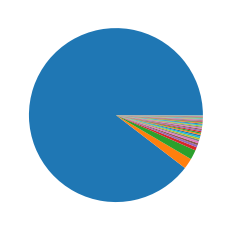

In [55]:
plt.pie(train.NativeCountry.value_counts().values)
plt.show()

In [56]:
grouper = train.groupby("NativeCountry", as_index=False)["Age"].count()
grouper.columns = ["NativeCountry", "Counts"]
grouper.head()

,NativeCountry,Counts
0,?,583
1,Cambodia,19
2,Canada,121
3,China,75
4,Columbia,59


In [57]:
train.NativeCountry.values

array([' United-States', ' United-States', ' United-States', ...,
       ' United-States', ' United-States', ' United-States'], dtype=object)

In [58]:
train["NativeCountry"] = train["NativeCountry"].apply(lambda x: "US" if x == " United-States" else "Others")

In [59]:
train["NativeCountry"].value_counts()

US        29169
Others     3391
Name: NativeCountry, dtype: int64

In [60]:
#adding to the encCol list
encCol.append("NativeCountry")
encCol

['Workclass',
 'MaritalStatus',
 'Occupation',
 'Relationship',
 'Race',
 'NativeCountry']

## Encoding the Features 

In [61]:
train.dtypes

Age                 int64
Workclass          object
EducationNumber     int64
MaritalStatus      object
Occupation         object
Relationship       object
Race               object
Sex                 int64
Hours/Week          int64
NativeCountry      object
Target              int64
dtype: object

In [62]:
#target is an object -> have to parse it to int
train["Target"] = train["Target"].astype(int)

In [63]:
train.dtypes

Age                 int64
Workclass          object
EducationNumber     int64
MaritalStatus      object
Occupation         object
Relationship       object
Race               object
Sex                 int64
Hours/Week          int64
NativeCountry      object
Target              int64
dtype: object

In [64]:
data = pd.get_dummies(train, drop_first = True, columns = encCol)
data.head()

,Age,EducationNumber,Sex,Hours/Week,Target,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,...,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,NativeCountry_US
0,50,13,0,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,38,9,0,40,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,1
2,53,7,0,40,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,28,13,1,40,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
4,37,14,1,40,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,1


In [65]:
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score, cross_val_predict

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train = data
del X_train["Target"]

In [68]:
X_train

,Age,EducationNumber,Sex,Hours/Week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,...,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,NativeCountry_US
0,50,13,0,13,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
1,38,9,0,40,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,1
2,53,7,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,28,13,1,40,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
4,37,14,1,40,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,12,1,38,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,1
32556,40,9,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
32557,58,9,1,40,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,1
32558,22,9,0,20,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,1


In [70]:
data.head()

,Age,EducationNumber,Sex,Hours/Week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,...,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,NativeCountry_US
0,50,13,0,13,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
1,38,9,0,40,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,1
2,53,7,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,28,13,1,40,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
4,37,14,1,40,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,1


In [71]:
y_train = train["Target"]
y_train.value_counts()

0    24719
1     7841
Name: Target, dtype: int64

In [72]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
cv=5
param_grid = {'C': [0.1, 0.4, 0.7, 1, 4, 7, 10]}
grid1 = GridSearchCV(lr, param_grid, cv=cv).fit(X_train, y_train)
print("Grid Logistic Regression: ", grid1.best_score_, grid1.best_params_)

Grid Logistic Regression:  0.8343980343980345 {'C': 1}


In [97]:
from sklearn.model_selection import cross_val_score
logreg = LogisticRegression(C=1)
scores = cross_val_score(logreg, X_train, y_train, cv=5)
print(f"Scores of the 5 different splitting-sets:\n{scores}")
print(f"Mean of the 5 values: {scores.mean()}")

Scores of the 5 different splitting-sets:
[0.83230958 0.83077396 0.83154177 0.8404484  0.83691646]
Mean of the 5 values: 0.8343980343980345


In [76]:
from sklearn.svm import SVC
svc = SVC()
param_grid = {'C': [0.1, 0.7, 1, 10]}
grid1 = GridSearchCV(svc, param_grid, cv=cv).fit(X_train, y_train)
print("Grid SVC: ", grid1.best_score_, grid1.best_params_)

Grid SVC:  0.8362714987714988 {'C': 10}


In [75]:
svc=SVC().fit(X_train, y_train)
svc.score(X_train, y_train)

0.8263513513513514

In [78]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)
tree.score(X_train, y_train)

0.967536855036855

In [79]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 4, random_state = 0)
tree.fit(X_train, y_train)
tree.score(X_train, y_train)

0.8220208845208845

In [80]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100, random_state = 0)
forest.fit(X_train, y_train)
forest.score(X_train, y_train)

0.9674447174447175

In [85]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=1)
gbrt.fit(X_train, y_train)
gbrt.score(X_train, y_train)

0.8565110565110565

In [92]:
from sklearn.model_selection import cross_val_score
logreg = LogisticRegression(C=2)
scores = cross_val_score(logreg, X_train, y_train, cv=5)
print(scores)
print(scores.mean())

[0.83261671 0.83077396 0.83200246 0.84075553 0.83476658]
0.8341830466830468
